In [ ]:
import xarray as xr 

data = xr.open_zarr('../data/intermediate/evp_1200itr_long.zarr')
data.time_features.min()

c:\Users\charl\anaconda3\envs\ML\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
c:\Users\charl\anaconda3\envs\ML\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:210: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


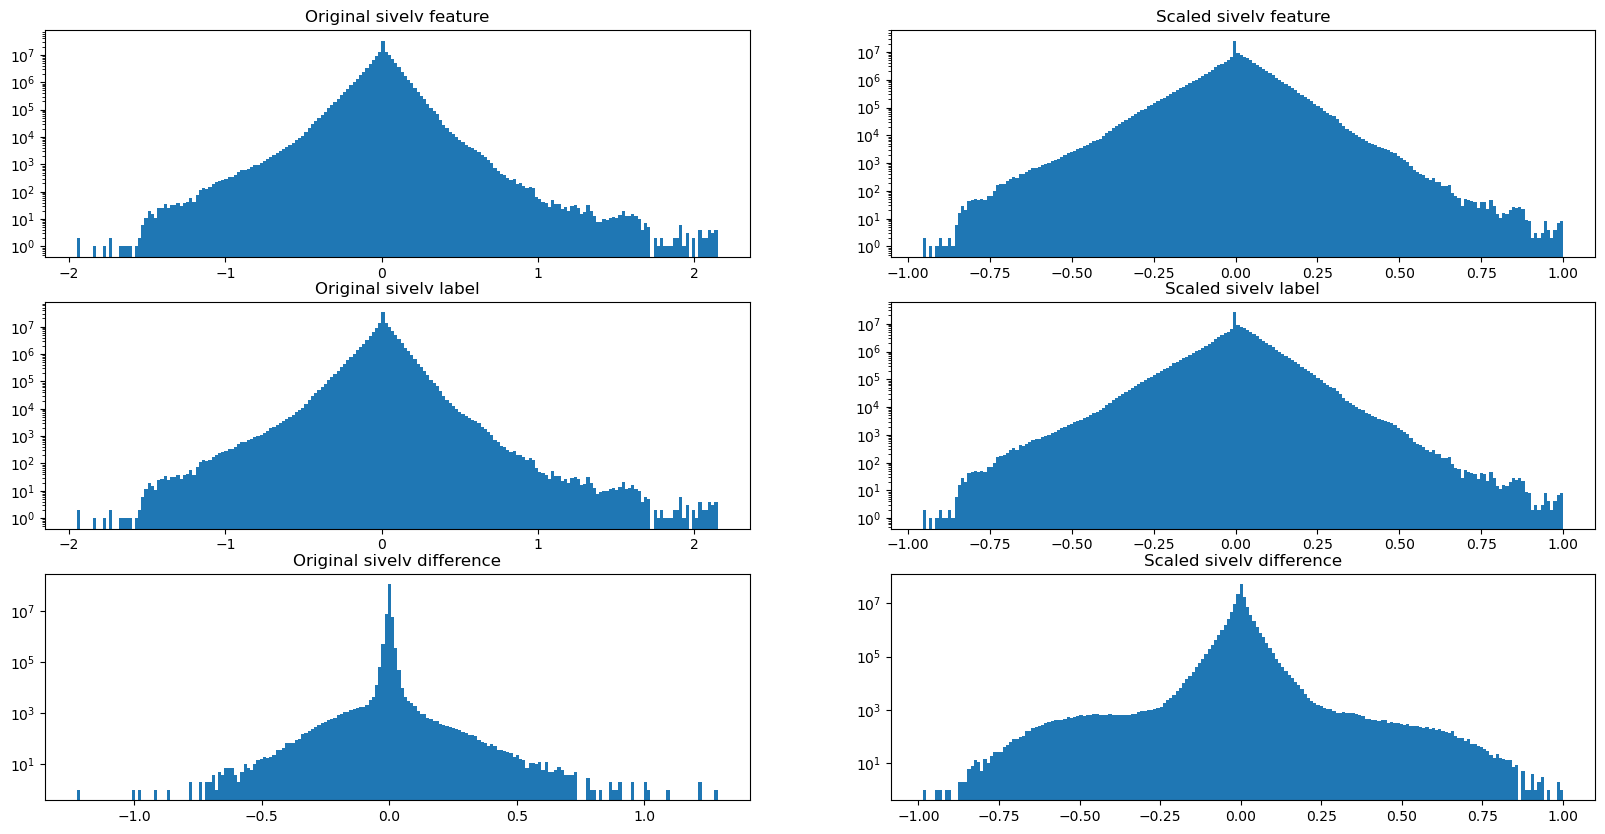

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler, FunctionTransformer, MinMaxScaler

def arcsinh_transform(x):
    return np.arcsinh(x * scale_factor)

def arcsinh_inverse(x):
    return np.sinh(x) / scale_factor

preprocessor = Pipeline([
    ('arcsinh', FunctionTransformer(func=arcsinh_transform, 
                                    inverse_func=arcsinh_inverse, 
                                    validate=True)),
    ('scaler', MaxAbsScaler())
])
preprocessor2 = copy.deepcopy(preprocessor)
preprocessor3 = copy.deepcopy(preprocessor)

scale_factor = 2
x = data.features.loc["sivelv"].data
x_scaled = preprocessor.fit_transform(x.reshape(-1, 1))

y = data.labels.loc["sivelv"].data
y_scaled = preprocessor2.fit_transform(x.reshape(-1, 1))

scale_factor = 20
diff = x - y
diff_scaled = preprocessor3.fit_transform(diff.reshape(-1, 1))

_, ax = plt.subplots(3, 2, figsize=(20, 10))
ax[0, 0].set(yscale='log', title='Original sivelv feature')
ax[0, 1].set(yscale='log', title='Scaled sivelv feature')
ax[1, 0].set(yscale='log', title='Original sivelv label')
ax[1, 1].set(yscale='log', title='Scaled sivelv label')
ax[2, 0].set(yscale='log', title='Original sivelv difference')
ax[2, 1].set(yscale='log', title='Scaled sivelv difference')

ax[0, 0].hist(x, bins=200)
ax[0, 1].hist(x_scaled, bins=200)
ax[1, 0].hist(y, bins=200)
ax[1, 1].hist(y_scaled, bins=200)
ax[2, 0].hist(diff, bins=200)
ax[2, 1].hist(diff_scaled, bins=200)
plt.show()